In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import torch.nn as nn
from tqdm import tqdm
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics

In [3]:
import ultralytics
from ultralytics import YOLO
from ultralytics.nn.modules import C2f
from ultralytics.nn.modules.conv import Conv


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


In [5]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

In [6]:
backbone = model.model.model
new_layers = nn.Sequential(
    *list(backbone[:5]),
    *list(backbone[9:])
).to('cuda:0')

model.model.model = new_layers


In [7]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

In [8]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(182, 2129872, 0, 0.0)

In [16]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 150,
        imgsz=640,
        batch=64,
        freeze = [f'model.{i}' for i in range(18)],
        augment=True,
        visualize=True,
        single_cls = True)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=150, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train83, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream

train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train83/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train83
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.57G      2.597      2.891      2.444         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       8.5G      2.614      2.933      2.455         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.52G      2.618      2.685      2.129         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.52G      2.752      2.846      2.204         23        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.56G      2.408       2.62      2.225         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.55G      2.535      2.582      2.188         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.56G      2.426      2.134      2.081         37        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       8.5G      2.255      2.194      2.076         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       8.5G      2.186      1.965       1.92         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       8.5G      2.427      2.091      2.152         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       8.5G      2.155      1.806      1.857         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.56G      1.977      1.841      1.707         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       8.5G      2.137      1.819      1.921         40        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       8.5G      2.073      1.697      1.823         36        640: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       8.5G      2.124       1.73      1.781         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.57G      1.958      1.737      1.811         37        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.51G      1.935      1.869       1.84         20        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.56G      1.923      1.581      1.641         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


                   all         10         10          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.56G      1.975      1.602      1.747         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.56G      2.137      1.747      1.801         36        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       8.5G      1.938       1.62        1.7         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       8.5G      1.871      1.633      1.797         23        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         10         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.56G      2.051      1.557      1.743         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         10         10          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.55G      1.885      1.705      1.772         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         10         10    0.00211        0.1    0.00117   0.000233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.56G      1.865      1.603      1.625         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         10    0.00214        0.1    0.00119   0.000238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       8.5G      1.914      1.599      1.703         35        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         10         10    0.00426        0.2    0.00256   0.000491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.56G       1.99      1.595       1.68         38        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         10         10    0.00217        0.1    0.00331   0.000661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       8.5G       1.79      1.468      1.564         25        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         10         10    0.00224        0.1    0.00193   0.000193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       8.5G      1.914      1.384      1.609         28        640: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         10         10    0.00225        0.1    0.00833   0.000833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       8.5G      1.841      1.528      1.638         24        640: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         10         10     0.0067        0.3     0.0132    0.00196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.55G      1.792      1.497      1.654         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10         10     0.0064        0.3     0.0227    0.00515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       8.5G      1.757      1.329       1.57         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         10         10    0.00396        0.2     0.0231    0.00504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       8.5G      1.967      1.476       1.73         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         10         10    0.00448        0.3     0.0186    0.00477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.56G      1.982      1.539      1.881         19        640: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         10         10    0.00552        0.4     0.0089     0.0031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.56G      1.912      1.411      1.692         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         10         10     0.0108        0.3     0.0228    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.56G      1.838       1.42      1.645         36        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         10         10     0.0486        0.2     0.0668     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.56G      2.033      1.587      1.763         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         10         10      0.401        0.1     0.0752     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       8.5G      1.984       1.46      1.763         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         10         10      0.604      0.162      0.225     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       8.5G      1.913      1.279      1.644         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10         10      0.469        0.2      0.211     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       8.5G        1.9      1.431      1.664         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         10      0.781      0.363      0.436      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.56G      2.089      1.546      1.825         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         10         10       0.65      0.374      0.428      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       8.5G      1.818      1.425       1.69         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         10         10      0.234        0.1      0.227     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       8.5G      1.959      1.372      1.635         40        640: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         10         10      0.446        0.2      0.261      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       8.5G       1.84      1.497      1.722         29        640: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         10         10      0.407      0.346      0.333     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       8.5G      1.835      1.375      1.649         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         10         10      0.521       0.33      0.333     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       8.5G      1.758       1.29      1.597         35        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         10         10      0.397        0.2      0.237     0.0716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.56G      1.839       1.33      1.703         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         10         10       0.28        0.2      0.106      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       8.5G      1.669        1.3      1.505         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10         10       0.48       0.28      0.254     0.0592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       8.5G      1.856      1.335      1.702         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         10         10     0.0157        0.6      0.146     0.0442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       8.5G      1.799      1.371      1.685         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         10         10      0.013        0.5      0.108      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       8.5G      1.787      1.347      1.631         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10         10      0.397        0.2       0.23      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       8.5G      1.963      1.412      1.727         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.178        0.1      0.301      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       8.5G      1.863      1.314      1.519         45        640: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         10      0.168        0.6      0.377     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.56G      1.931      1.444      1.798         22        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         10         10      0.269        0.1     0.0588     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.55G      2.038      1.276      1.587         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10         10      0.378        0.1      0.101     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.56G      1.857      1.313       1.54         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         10         10      0.178        0.1      0.269     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       8.5G      1.988       1.53      1.844         32        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         10         10       0.27        0.1      0.231     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       8.5G      1.684      1.322      1.636         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         10         10      0.634       0.18      0.247      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       8.5G      1.876      1.259      1.576         23        640: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         10         10      0.631        0.2      0.278        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.56G      1.819      1.213      1.648         28        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.519      0.219      0.365     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       8.5G      1.875      1.433      1.632         24        640: 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         10         10      0.404      0.477      0.333      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       8.5G      1.738      1.315      1.613         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         10         10       0.53        0.5       0.46      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.62G      1.923      1.277      1.585         35        640: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         10         10      0.646        0.4      0.442       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.56G      1.815       1.25      1.591         39        640: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10      0.794      0.387      0.473      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       8.5G       1.74      1.414      1.582         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.534        0.3      0.326      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       8.5G      1.885      1.336      1.691         32        640: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         10         10      0.141        0.3      0.225     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       8.5G      1.648      1.133      1.422         28        640: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.228        0.4      0.321     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.56G      1.666      1.109      1.409         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         10         10      0.425       0.52      0.383     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       8.5G      1.891      1.348      1.759         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         10       0.76        0.4      0.452      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       8.5G      1.856      1.239      1.611         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         10         10      0.538        0.4      0.445      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.56G      1.698      1.225      1.555         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         10         10      0.634        0.4      0.446      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       8.5G      1.784       1.24      1.584         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         10         10      0.841        0.3      0.388      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.55G      1.833      1.347       1.67         37        640: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10         10      0.406        0.4      0.404     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.56G      1.732      1.127      1.475         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.536        0.4       0.42      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       8.5G      1.663        1.2      1.576         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.623      0.496       0.43      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       8.5G      1.754      1.248      1.505         26        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         10         10      0.784        0.4      0.456       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.56G      1.591      1.221      1.526         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         10         10      0.851        0.4      0.498      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       8.5G       1.66      1.186      1.614         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10      0.461        0.5      0.457       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.56G      1.715      1.191        1.5         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         10         10      0.335        0.5      0.359     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       8.5G      1.685      1.167       1.46         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         10         10       0.27        0.4      0.269     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.56G      1.696      1.146      1.486         38        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         10         10      0.297        0.6      0.233     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       8.5G      1.636      1.118      1.494         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         10         10      0.586        0.3      0.342     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.56G      1.704      1.331      1.706         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         10         10      0.686        0.3      0.406      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.55G      1.867      1.157      1.552         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         10         10      0.289        0.5       0.31     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       8.5G      1.727      1.174      1.576         27        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         10         10      0.409        0.4      0.387        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.56G      1.723      1.193      1.538         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.285      0.479      0.217     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.55G      1.843       1.31      1.637         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         10         10      0.331        0.6      0.244     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150       8.5G      1.454      1.035      1.435         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         10         10      0.332        0.4       0.28     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       8.5G      1.823      1.166      1.605         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10         10      0.446        0.4      0.266      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       8.5G       1.53       0.98      1.358         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         10         10      0.418        0.4      0.206     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150       8.5G      1.552      1.101      1.524         26        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         10         10      0.407        0.3      0.181     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.56G      1.753      1.117      1.628         23        640: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         10         10      0.435        0.4      0.302     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       8.5G      1.603      1.267      1.649         22        640: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         10         10      0.339        0.3      0.248     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       8.5G      1.547      1.071      1.501         34        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10         10      0.322      0.335      0.281     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       8.5G      1.732      1.245      1.576         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         10         10      0.452        0.4      0.465     0.0976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.56G      1.608      1.166      1.586         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         10         10      0.783        0.4      0.572       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       8.5G       1.59      1.031      1.408         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10         10      0.619        0.5      0.555      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       8.5G      1.559      1.093      1.466         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         10         10      0.646       0.55       0.59      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       8.5G      1.394     0.9322      1.321         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         10         10      0.629        0.7      0.595      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       8.5G      1.514     0.9745      1.348         24        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         10         10       0.73        0.6      0.585      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       8.5G      1.416     0.9985      1.398         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         10         10      0.578      0.549      0.555      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       8.5G      1.649      1.121      1.587         26        640: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         10         10      0.622      0.495      0.553       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       8.5G       1.52      1.035       1.49         32        640: 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         10         10      0.515      0.639      0.571      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.56G      1.528     0.9788      1.417         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         10         10      0.556        0.7      0.586      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       8.5G      1.488     0.9456      1.362         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         10         10          1      0.393      0.576      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       8.5G      1.553      1.034      1.491         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10      0.682        0.3      0.398     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       8.5G      1.416     0.9615      1.427         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         10         10      0.441        0.4      0.435     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.55G      1.438     0.8994      1.352         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         10         10      0.642        0.4      0.397     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       8.5G      1.534     0.9524       1.35         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         10         10       0.64        0.4      0.435     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       8.5G      1.477     0.9805      1.261         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         10         10      0.549        0.4      0.502      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.56G      1.368     0.9509      1.382         27        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         10         10      0.888        0.3      0.484      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.56G      1.355     0.8904      1.335         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         10         10      0.967        0.3      0.483      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.56G      1.475      1.036      1.386         22        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         10         10      0.507        0.4      0.352     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       8.5G       1.55       1.16      1.532         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         10         10      0.478        0.4      0.385      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       8.5G       1.41     0.9489      1.405         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.441        0.5       0.47     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       8.5G       1.63      1.042      1.468         34        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         10         10      0.469        0.5      0.487     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       8.5G      1.413     0.8966      1.363         29        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         10         10      0.349        0.5       0.44      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.56G      1.471     0.9736      1.431         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         10         10      0.524      0.661      0.611      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.56G      1.239     0.8712      1.252         25        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         10         10       0.48        0.7      0.607      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150       8.5G      1.452     0.9562      1.429         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         10         10      0.591      0.579      0.564      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.56G      1.442     0.9707      1.348         33        640: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         10         10       0.35      0.702      0.494      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       8.5G      1.487      1.016      1.583         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         10         10      0.283      0.435      0.273     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.56G      1.517      1.008      1.401         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         10         10      0.551        0.6      0.575      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.56G      1.305     0.8732      1.356         26        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10      0.575      0.679      0.572      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       8.5G      1.393     0.9689      1.355         30        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10      0.507        0.5       0.51      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       8.5G      1.425     0.9161       1.36         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.468        0.5      0.516      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.56G      1.365     0.9375      1.475         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         10         10      0.528        0.5      0.531      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.55G      1.459     0.9709      1.401         23        640: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         10         10      0.625        0.7      0.613      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.56G      1.387     0.9204      1.377         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         10         10      0.622        0.6      0.636      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       8.5G       1.35     0.8448      1.255         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         10         10      0.551      0.615      0.664      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.55G      1.324     0.9334      1.326         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         10         10       0.47      0.623      0.578       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       8.5G       1.35     0.9256      1.369         31        640: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         10      0.385      0.502      0.555      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.56G      1.306     0.8503      1.303         33        640: 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         10         10        0.9        0.3      0.463      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       8.5G      1.419     0.8844      1.328         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         10         10      0.433        0.5      0.528      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.56G      1.314     0.8953      1.321         32        640: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         10         10      0.596        0.5      0.618      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       8.5G      1.477     0.9044        1.5         29        640: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         10         10      0.637        0.6      0.626      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150       8.5G      1.461       1.01      1.431         29        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         10         10      0.694      0.681      0.648      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       8.5G      1.254     0.8492      1.322         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         10         10      0.637        0.7      0.637       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.55G      1.368     0.8831      1.378         37        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         10         10      0.636        0.7      0.632      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       8.5G      1.347     0.8671      1.346         34        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


                   all         10         10      0.664        0.7      0.634      0.143
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.51G      1.197     0.9489      1.222         15        640: 100%|██████████| 2/2 [00:05<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         10         10      0.533        0.6      0.563      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       8.5G      1.231     0.9277      1.243         18        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         10      0.538        0.6      0.554      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.51G      1.371     0.9897      1.409         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         10      0.477        0.6      0.548      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.51G      1.224     0.8664       1.28         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         10         10      0.452        0.6      0.528      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       8.5G      1.209     0.8379      1.213         17        640: 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         10         10      0.513        0.5      0.527      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.51G      1.313     0.9092      1.339         15        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         10         10      0.454        0.6      0.539      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.51G      1.209      0.884      1.319         15        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         10         10      0.374        0.5      0.344      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       8.5G      1.328     0.8699      1.329         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         10         10      0.495      0.588      0.501      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.51G       1.18     0.8642      1.315         15        640: 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10       0.45        0.6      0.491      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.51G      1.135     0.8282      1.222         15        640: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         10         10      0.447        0.6      0.491      0.106



150 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train83/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train83/weights/best.pt, 5.6MB

Validating runs/detect/train83/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]


                   all         10         10      0.655        0.6      0.619      0.215
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train83


In [17]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.654952439877063, 0.6, 0.6187887864823349, 0.21519652863267175)

In [14]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test")



image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 640x640 2 Gunss, 150.4ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 640x640 1 Guns, 51.1ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 640x640 5 Gunss, 36.6ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 640x640 4 Gunss, 36.2ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 640x640 5 Gunss, 36.2ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 640x640 1 Guns, 43.5ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 640x640 5 Gunss, 45.5ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 640x640 1 Guns, 37.3ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 640x640 (no detections), 36.5ms
image 10/10 /content/drive/MyDr

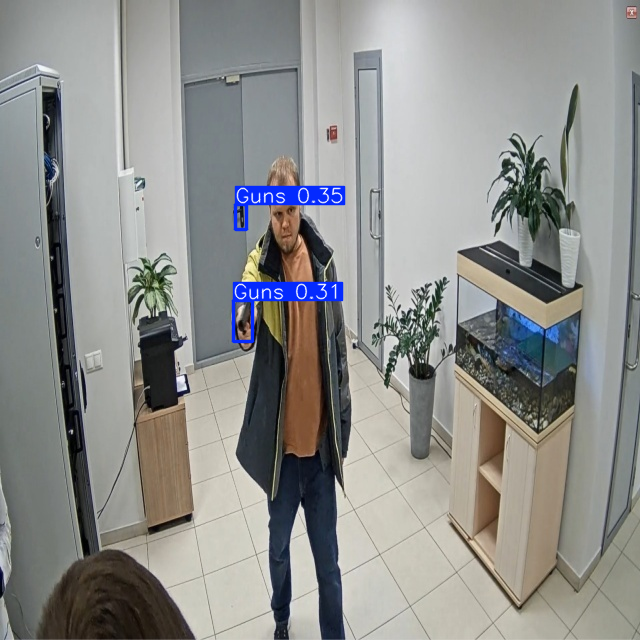

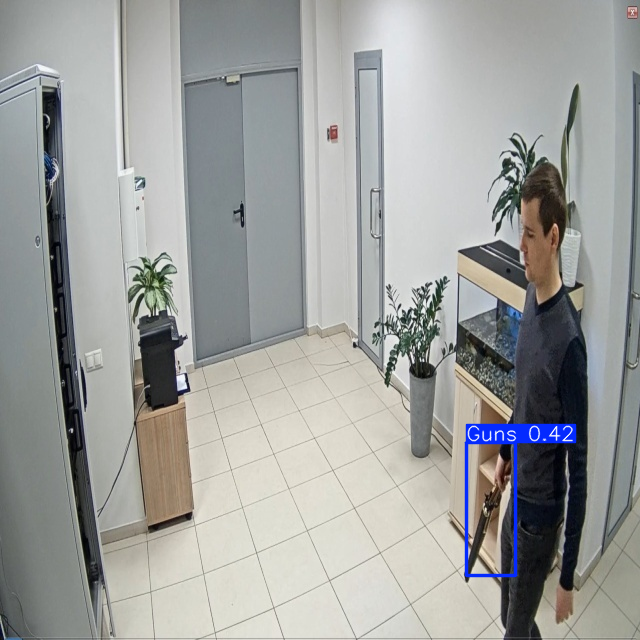

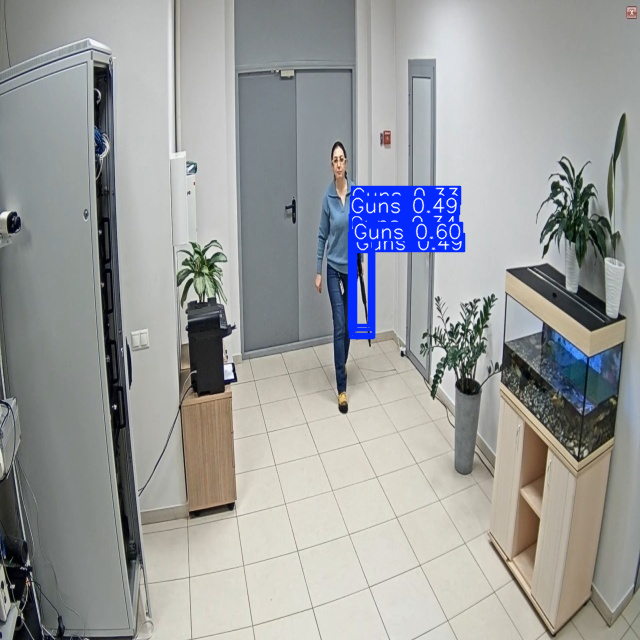

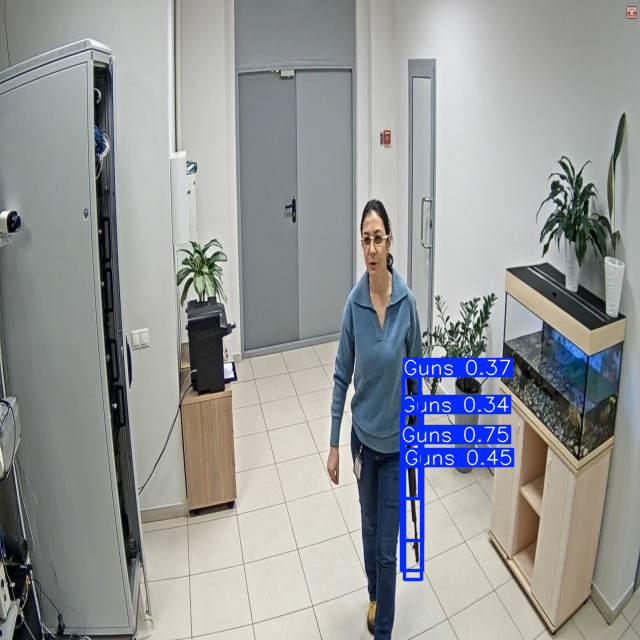

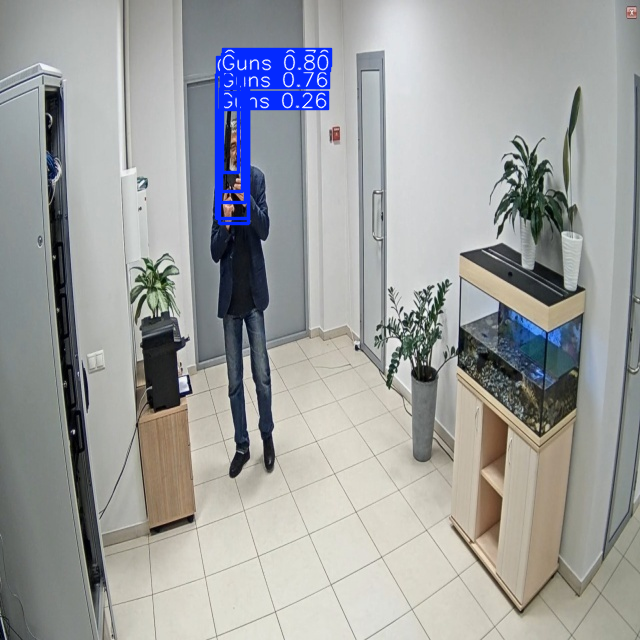

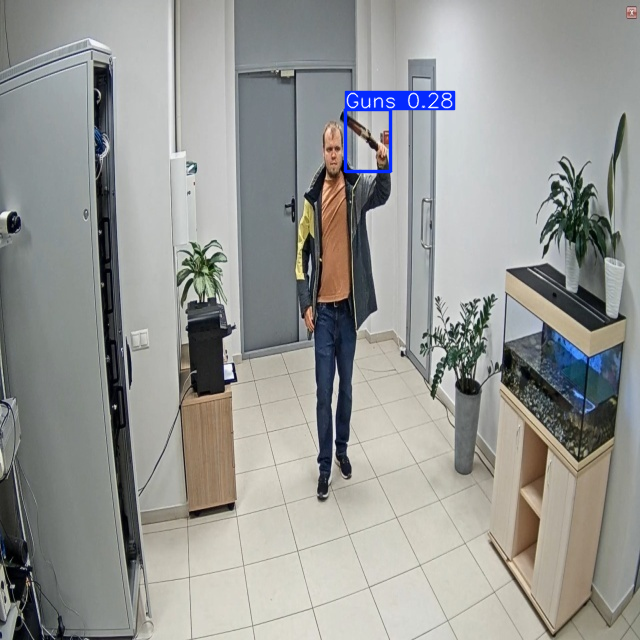

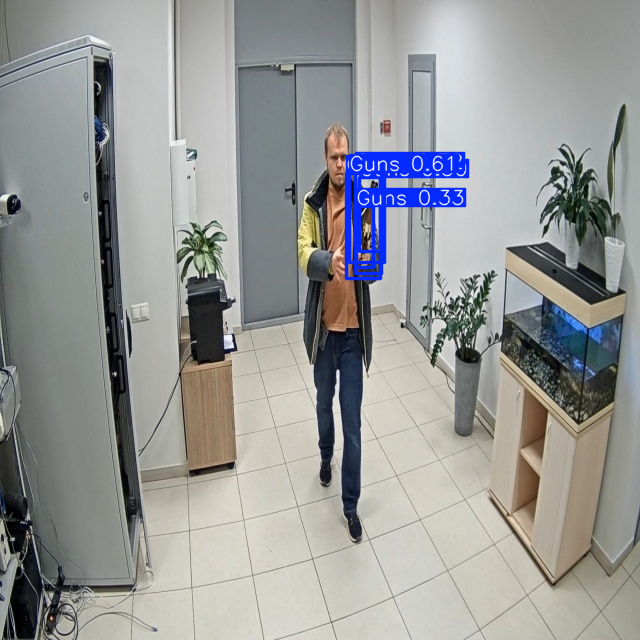

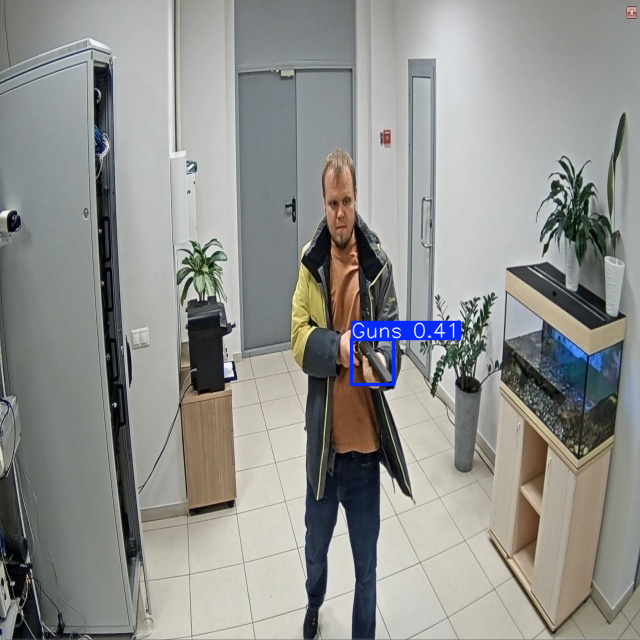

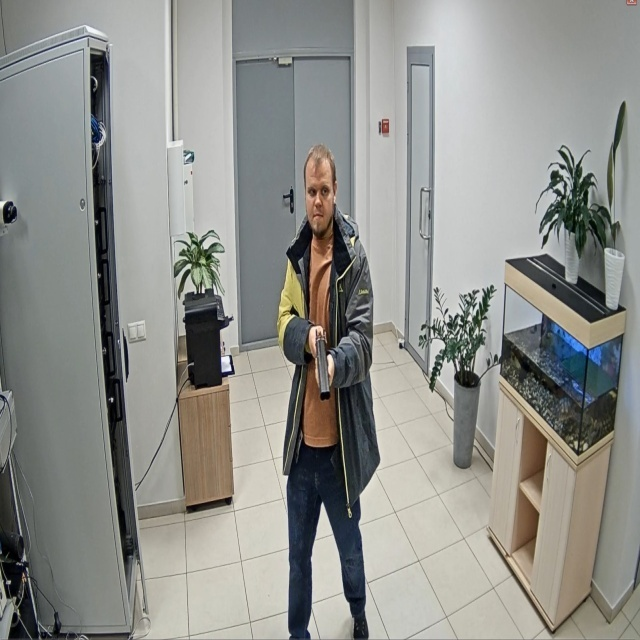

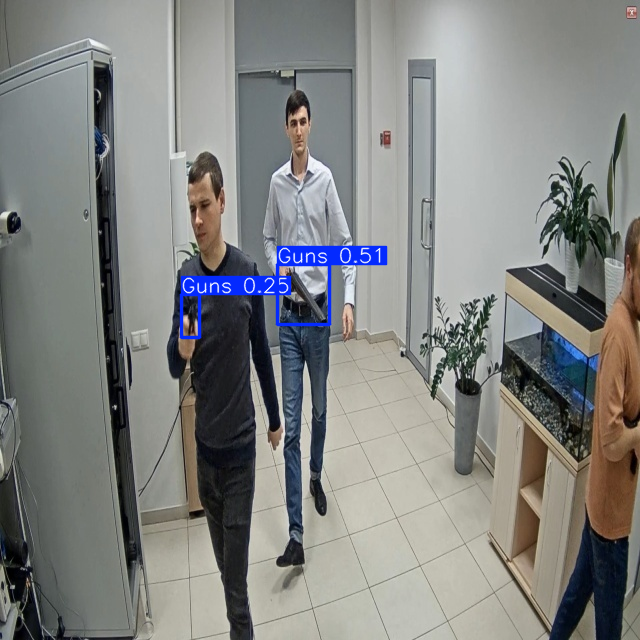

In [15]:
for result in predictions:
    result.show()